In [1]:
import pandas as pd
path='C:/Users/eleli/Poder_vc_DR3_input_v2.csv'
df=pd.read_csv(path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [7]:
import sys
sys.path.append('../gaia_tools')
from covariance_generation import generate_covmatrices, generate_covmat

In [4]:
len(df)

665660

In [5]:
df.columns

Index(['source_id', 'ra', 'dec', 'rgeo', 'b_rgeo', 'B_rgeo', 'b_rpgeo',
       'B_rpgeo', 'ra_error', 'dec_error', 'parallax', 'parallax_error', 'PM',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'radial_velocity',
       'radial_velocity_error', 'rGSPPhot', 'ra_dec_corr', 'ra_pmdec_corr',
       'ra_parallax_corr', 'ra_pmra_corr', 'b_rGSPPhot', ' B_rGSPPhot',
       'dec_pmra_corr', 'dec_pmdec_corr', 'dec_parallax_corr',
       'parallax_pmdec_corr', 'parallax_pmra_corr', 'pmra_pmdec_corr',
       'r_est_rpgeo', 'parallax_over_error'],
      dtype='object')

In [131]:
generate_covmatrices(df,
                         df_crt = df_new,
                         transform_to_galcen = True,
                         transform_to_cylindrical = True,
                         z_0 = 25,
                         r_0 = 8277,
                         is_bayes = True,
                         is_unpack_velocity = False,
                         debug = False)

r_est_error not in data!


KeyError: "['r_est'] not in index"

In [12]:
g=generate_covmat(df, is_parallax=True)
g.shape

(665660, 6, 6)

1. Genereeri kovariatsiooni maatriksid:
Milline on keskmine viga omaliikumises ja radiaalkiirustes. Tee jaotust iseloomustavad histogrammid ja arvuta välja ka milline on vea mediaan.



In [51]:
pmraerrorlist=[]
for i in range(len(g)):
  pmraerror_i=np.sqrt(g[i][3,3])
  pmraerrorlist.append(pmraerror_i)

pmra=np.array(pmraerrorlist)

In [52]:
np.median(pmra)
#np.median(df.pmra_error)

0.015

In [53]:
pmdecerrorlist=[]
for i in range(len(g)):
  pmdecerror_i=np.sqrt(g[i][4,4])
  pmdecerrorlist.append(pmdecerror_i)

pmdec=np.array(pmdecerrorlist)
len(pmdec)

665660

In [55]:
np.median(pmdec)
#np.median(df.pmdec_error)

0.014

In [56]:
pmraveerrorlist=[]
for i in range(len(g)):
  pmraveerror_i=np.sqrt(g[i][5,5])
  pmraveerrorlist.append(pmraveerror_i)

pmrave=np.array(pmraveerrorlist)
pmrave

array([0.13, 0.13, 1.12, ..., 0.12, 0.12, 0.12])

In [58]:
np.median(pmrave)

0.73

(0.0, 0.1)

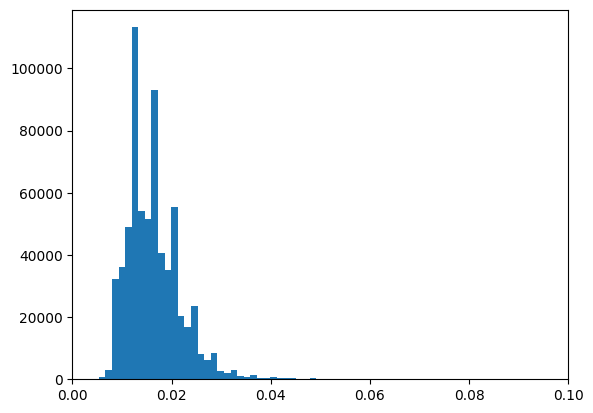

In [59]:
fig, ax=plt.subplots()
ax.hist(df.pmra_error,bins=500)
plt.xlim(0,0.1)


In [61]:
np.mean(df.pmra)

-2.505876198059069

(0.0, 0.1)

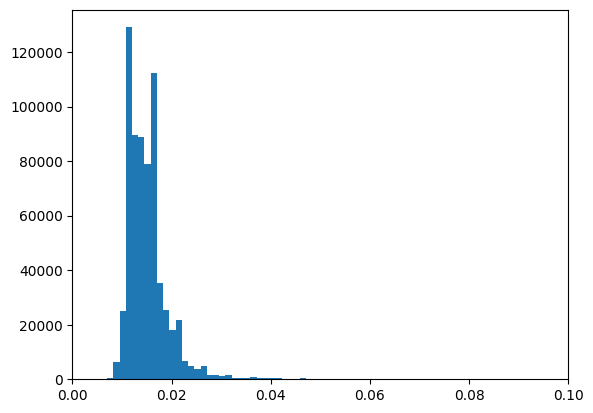

In [31]:
fig, ax=plt.subplots()
ax.hist(df.pmdec_error,bins=500)
plt.xlim(0,0.1)

(0.0, 6.0)

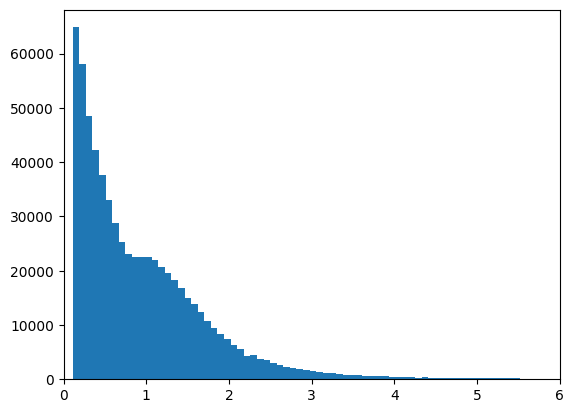

In [36]:
fig, ax=plt.subplots()
ax.hist(df.radial_velocity_error,bins=500)
plt.xlim(0,6)


2. Teisenda need Galaktotsentrilisse taustsüsteemi Cartesian koordinaatidesse:
Milline on keskmine viga kõigis kiiruste komponentides. Tee jaotust iseloomustavad histogrammid ja arvuta välja ka milline on vea mediaan.


In [62]:
from covariance_generation import transform_cov_matrix

In [87]:
T=transform_cov_matrix(g, 
                        df.to_numpy(), 
                        'Cartesian', 
                        z_0 = 25, 
                        r_0 = 8277, 
                        is_bayes = False,
                        NUMPY_LIB = np, 
                        dtype = np.float64)
#transformeerib vead (x,y,z,vx,vy,vz) Cartesian'i

In [88]:
vxerrorlist=[]
for i in range(len(g)):
  vxerror_i=np.sqrt(T[i][3,3])
  vxerrorlist.append(vxerror_i)

vx=np.array(vxerrorlist)
vx

array([18.00621109,  7.97175374, 15.05255473, ...,  6.01080736,
       57.62343679,  1.34098875])

In [89]:
np.median(vx)

0.39639749536994423

In [90]:
vyerrorlist=[]
for i in range(len(g)):
  vyerror_i=np.sqrt(T[i][4,4])
  vyerrorlist.append(vyerror_i)

vy=np.array(vyerrorlist)
vy

array([11.72498465, 16.16845945, 15.22377126, ...,  6.15914421,
       10.21561511, 82.83172563])

In [91]:
np.median(vy)

0.46363811920983045

In [92]:
vzerrorlist=[]
for i in range(len(g)):
  vzerror_i=np.sqrt(T[i][5,5])
  vzerrorlist.append(vzerror_i)

vz=np.array(vzerrorlist)
vz

array([11.55792429,  1.45276427, 67.64368136, ..., 25.42778071,
       13.14343888, 37.31737562])

In [93]:
np.median(vz)

0.3907791362801615

In [96]:
np.max(vx)

4539701145.333647

In [100]:
np.linspace(0, 2, 10)

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

(array([13923., 28414., 37154., 37720., 34610., 30491., 27652., 24877.,
        22654., 20745., 19466., 17647., 16174., 14905., 13876., 13169.,
        12198., 11494., 10998., 10171.,  9717.,  9302.,  8926.,  8457.,
         8070.,  7737.,  7452.,  7103.,  6818.,  6522.,  6161.,  6028.,
         5507.,  5297.,  5020.,  4797.,  4478.,  4129.,  4114.,  3769.,
         3625.,  3475.,  3196.,  3092.,  2867.,  2771.,  2496.,  2465.,
         2335.,  2229.,  2061.,  1947.,  1798.,  1791.,  1634.,  1547.,
         1477.,  1414.,  1302.,  1359.,  1242.,  1185.,  1169.,  1046.,
         1032.,   973.,   936.,   930.,   917.,   859.,   773.,   747.,
          719.,   747.,   685.,   729.,   680.,   675.,   646.,   607.,
          587.,   525.,   544.,   510.,   551.,   525.,   447.,   444.,
          451.,   439.,   386.,   392.,   413.,   376.,   363.,   415.,
          354.,   328.,   395.]),
 array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
        0.15151515, 0.18181818, 0.

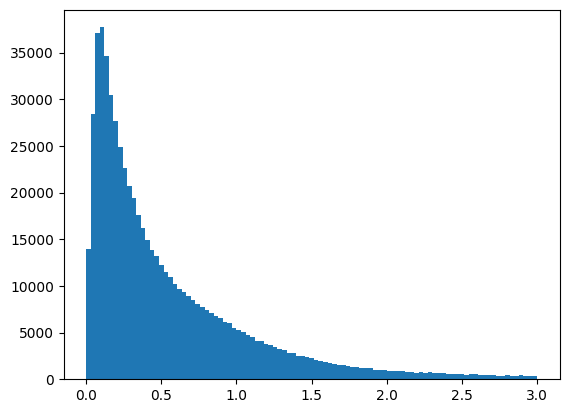

In [102]:
fig, ax=plt.subplots()
ax.hist(vx,bins=np.linspace(0,3,100))

(array([10720., 23583., 29592., 33635., 31600., 27989., 25443., 23063.,
        21510., 19996., 18555., 17247., 16151., 15223., 14370., 13733.,
        12755., 12075., 11376., 10992., 10142.,  9905.,  9287.,  9085.,
         8584.,  8241.,  7978.,  7579.,  7339.,  7145.,  6741.,  6554.,
         6330.,  5922.,  5789.,  5591.,  5395.,  5148.,  4747.,  4604.,
         4304.,  4212.,  3977.,  3718.,  3589.,  3437.,  3300.,  3054.,
         2989.,  2811.,  2688.,  2498.,  2356.,  2287.,  2196.,  1973.,
         1856.,  1803.,  1845.,  1657.,  1628.,  1469.,  1468.,  1380.,
         1308.,  1268.,  1229.,  1200.,  1185.,  1101.,  1017.,  1070.,
          918.,   888.,   881.,   840.,   824.,   805.,   761.,   731.,
          664.,   693.,   707.,   645.,   669.,   579.,   564.,   570.,
          569.,   546.,   487.,   499.,   460.,   484.,   470.,   438.,
          421.,   476.,   386.]),
 array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
        0.15151515, 0.18181818, 0.

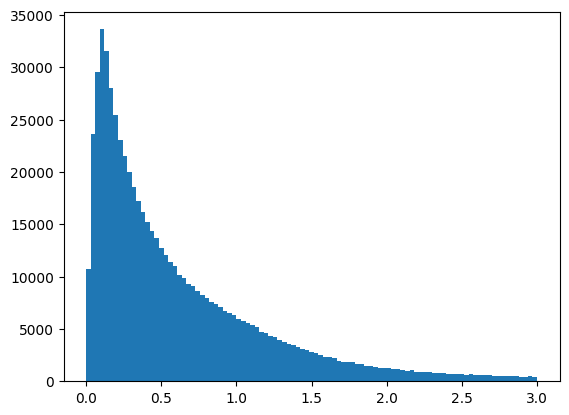

In [104]:
fig, ax=plt.subplots()
ax.hist(vy,bins=np.linspace(0,3,100))

(array([13919., 29144., 37618., 38052., 34944., 31239., 27768., 25233.,
        22802., 20675., 19088., 17665., 16287., 15206., 14043., 13116.,
        12306., 11410., 10621., 10078.,  9863.,  9083.,  8840.,  8410.,
         8070.,  7665.,  7310.,  7061.,  6703.,  6348.,  6055.,  5744.,
         5407.,  5296.,  4921.,  4672.,  4563.,  4024.,  3859.,  3859.,
         3553.,  3367.,  3115.,  2919.,  2852.,  2692.,  2435.,  2381.,
         2190.,  2122.,  2058.,  1869.,  1899.,  1633.,  1703.,  1488.,
         1493.,  1403.,  1310.,  1299.,  1289.,  1209.,  1062.,  1068.,
          977.,   961.,   935.,   971.,   903.,   849.,   793.,   762.,
          759.,   743.,   664.,   691.,   638.,   582.,   616.,   597.,
          539.,   577.,   523.,   474.,   491.,   511.,   440.,   452.,
          460.,   478.,   420.,   391.,   394.,   406.,   373.,   383.,
          344.,   346.,   332.]),
 array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
        0.15151515, 0.18181818, 0.

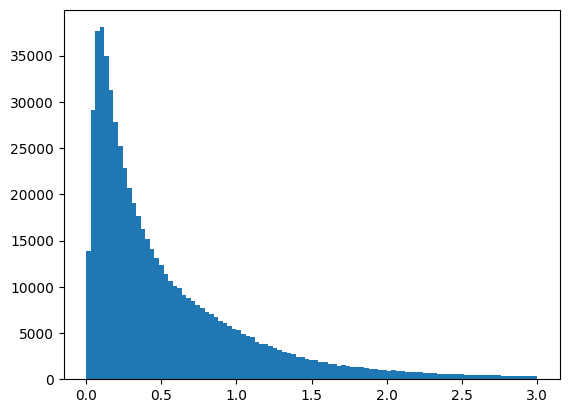

In [105]:
fig, ax=plt.subplots()
ax.hist(vz,bins=np.linspace(0,3,100))

3. Teisenda lõpuks silindrilistesse koordinaatidesse: 
Milline on keskmine viga kõigis kiiruste komponentides. Tee jaotust iseloomustavad histogrammid ja arvuta välja ka milline on vea mediaan.

In [110]:
from data_analysis import get_transformed_data

In [111]:
df_new=get_transformed_data(df)

In [112]:
D=transform_cov_matrix(T, 
                        df_new.to_numpy(), 
                        'Cylindrical', 
                        z_0 = 25, 
                        r_0 = 8277, 
                        is_bayes = False,
                        NUMPY_LIB = np, 
                        dtype = np.float64)
#transformeerib vead (r,phi,z,vr,vphi,vz) Cylindricali

In [113]:
vrerrorlist=[]
for i in range(len(g)):
  vrerror_i=np.sqrt(D[i][3,3])
  vrerrorlist.append(vrerror_i)

vr=np.array(vrerrorlist)
vr

array([438.72262736,  16.52334871, 105.80306664, ...,  70.18228285,
        37.74275182,  74.66574522])

In [114]:
np.median(vr)

0.5825469914912111

In [115]:
vphierrorlist=[]
for i in range(len(g)):
  vphierror_i=np.sqrt(D[i][4,4])
  vphierrorlist.append(vphierror_i)

vphi=np.array(vphierrorlist)
vphi

array([1843.37961811,  134.94121589, 3354.85351751, ..., 1043.50384094,
       1003.71679051,  535.35203843])

In [116]:
np.median(vphi)

1.6911813531248865

In [119]:
vzzerrorlist=[]
for i in range(len(g)):
  vzzerror_i=np.sqrt(D[i][5,5])
  vzzerrorlist.append(vzzerror_i)

vzz=np.array(vzzerrorlist)
vzz

array([11.55792429,  1.45276427, 67.64368136, ..., 25.42778071,
       13.14343888, 37.31737562])

In [120]:
np.median(vzz)

0.3907791362801615

(array([ 8013., 19592., 24945., 26996., 26861., 24529., 22760., 20883.,
        19424., 17866., 16819., 15597., 14412., 13611., 13005., 12216.,
        11554., 11076., 10437.,  9852.,  9533.,  8999.,  8726.,  8172.,
         7872.,  7716.,  7276.,  7025.,  6702.,  6482.,  6149.,  5938.,
         5729.,  5470.,  5143.,  4927.,  4817.,  4577.,  4436.,  4198.,
         3920.,  3801.,  3520.,  3434.,  3269.,  3008.,  2932.,  2871.,
         2639.,  2534.,  2500.,  2388.,  2237.,  2165.,  2081.,  1953.,
         1882.,  1884.,  1803.,  1671.,  1610.,  1549.,  1469.,  1428.,
         1403.,  1367.,  1290.,  1188.,  1199.,  1214.,  1069.,   981.,
         1080.,  1065.,   945.,   933.,   898.,   902.,   886.,   876.,
          825.,   842.,   801.,   757.,   753.,   725.,   737.,   710.,
          708.,   674.,   656.,   657.,   605.,   612.,   611.,   580.,
          578.,   548.,   542.]),
 array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
        0.15151515, 0.18181818, 0.

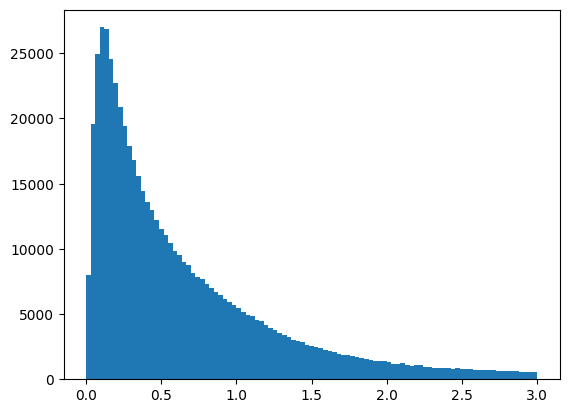

In [122]:
fig, ax=plt.subplots()
ax.hist(vr,bins=np.linspace(0,3,100))

(array([ 1615.,  4571.,  6400.,  7803.,  9236.,  9974., 10487., 10306.,
        10418., 10284.,  9966.,  9790.,  9458.,  9382.,  9188.,  8859.,
         8411.,  8315.,  7866.,  7675.,  7463.,  7294.,  7047.,  6804.,
         6646.,  6425.,  6160.,  6080.,  6044.,  5844.,  5687.,  5394.,
         5277.,  5078.,  4932.,  4718.,  4505.,  4281.,  4241.,  4126.,
         3912.,  3766.,  3572.,  3496.,  3447.,  3362.,  3186.,  3067.,
         3012.,  2950.,  2772.,  2679.,  2707.,  2450.,  2465.,  2370.,
         2288.,  2255.,  2190.,  2164.,  2079.,  2059.,  1986.,  1907.,
         1876.,  1774.,  1807.,  1721.,  1636.,  1654.,  1613.,  1594.,
         1552.,  1502.,  1489.,  1443.,  1403.,  1342.,  1344.,  1348.,
         1317.,  1259.,  1253.,  1214.,  1158.,  1147.,  1184.,  1153.,
         1157.,  1105.,  1112.,  1014.,  1089.,  1019.,   986.,   971.,
          993.,   970.,   929.]),
 array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
        0.15151515, 0.18181818, 0.

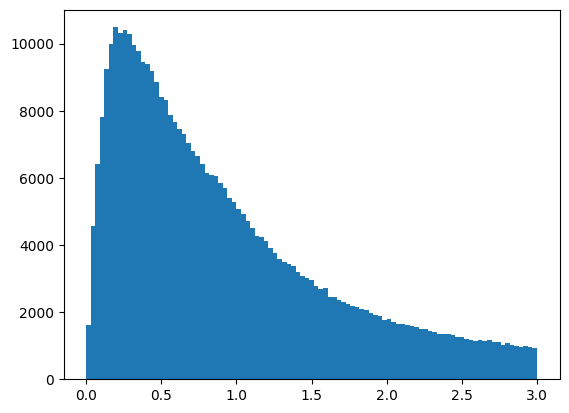

In [123]:
fig, ax=plt.subplots()
ax.hist(vphi,bins=np.linspace(0,3,100))

(array([13919., 29144., 37618., 38052., 34944., 31239., 27768., 25233.,
        22802., 20675., 19088., 17665., 16287., 15206., 14043., 13116.,
        12306., 11410., 10621., 10078.,  9863.,  9083.,  8840.,  8410.,
         8070.,  7665.,  7310.,  7061.,  6703.,  6348.,  6055.,  5744.,
         5407.,  5296.,  4921.,  4672.,  4563.,  4024.,  3859.,  3859.,
         3553.,  3367.,  3115.,  2919.,  2852.,  2692.,  2435.,  2381.,
         2190.,  2122.,  2058.,  1869.,  1899.,  1633.,  1703.,  1488.,
         1493.,  1403.,  1310.,  1299.,  1289.,  1209.,  1062.,  1068.,
          977.,   961.,   935.,   971.,   903.,   849.,   793.,   762.,
          759.,   743.,   664.,   691.,   638.,   582.,   616.,   597.,
          539.,   577.,   523.,   474.,   491.,   511.,   440.,   452.,
          460.,   478.,   420.,   391.,   394.,   406.,   373.,   383.,
          344.,   346.,   332.]),
 array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
        0.15151515, 0.18181818, 0.

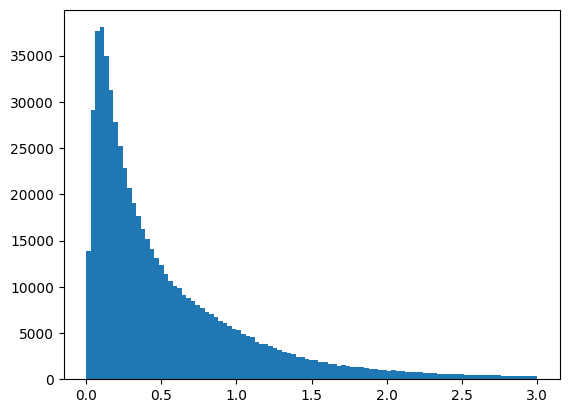

In [124]:
fig, ax=plt.subplots()
ax.hist(vzz,bins=np.linspace(0,3,100))

4. Tee joonised, kus kuvad valimi piirkonna (mingi 2D plot) aga punkt tiheduse asemel näitad kiirust iseloomustavaid vigasid. Näiteks näitad kuidas v_phi vigade väärtuste heatmap.


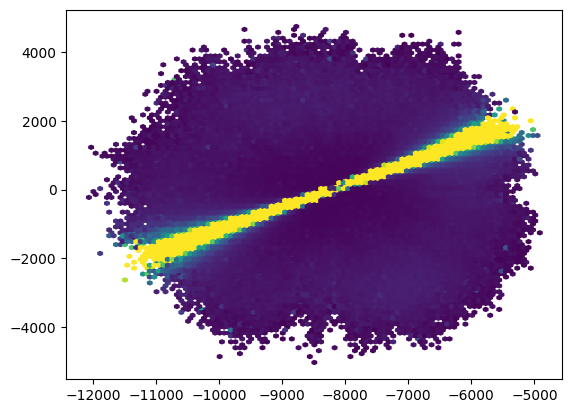

In [129]:
fig, ax=plt.subplots()
ax.hexbin(df_new.x,df_new.y,vx,vmin=0,vmax=10)